# Read Dataset

In [1]:
import pandas as pd

df = pd.read_csv("../datasets/dummy_sample_regression.csv")
df.sample(5)

,X (feature),y (target)
6,0.110923,11.354916
14,0.542560,59.060147
19,-1.724918,-100.287571
13,1.579213,105.403765
27,0.647689,48.980501


# Dataset Information

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   X (feature)  30 non-null     float64
 1   y (target)   30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


# Split Dataset

In [3]:
X = df.iloc[:, 0].to_numpy().reshape(-1, 1)
y = df.iloc[:, 1].to_numpy()

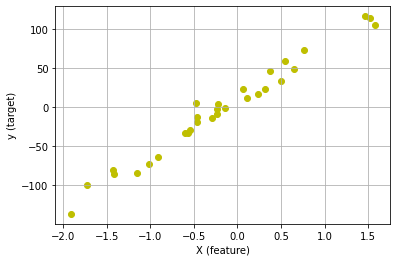

In [4]:
import matplotlib.pyplot as plt

plt.scatter(X, y, c="y")
plt.xlabel("X (feature)")
plt.ylabel("y (target)")
plt.grid();

# Build Model

Model yang digunakan adalah regresi linier. Regresi linier dapat dirumuskan dengan persamaan $y = Wx + b$, dimana $y = prediksi$, $W = Weight~(bobot)$, $x = fitur$, dan $b = bias$. Model regresi linier mencari nilai $W$ dan $b$ yang sesuai sehingga *error* yang dihasilkan dari prediksi menjadi sekecil mungkin.

Jika anda mengalami kesulitan dalam mengerti persamaan matematikanya, penjelasan lainnya secara konsep adalah membuat sebuah garis lurus lalu posisikan garis lurus tersebut sedemikian rupa sehingga bisa menghampiri semua sampel.

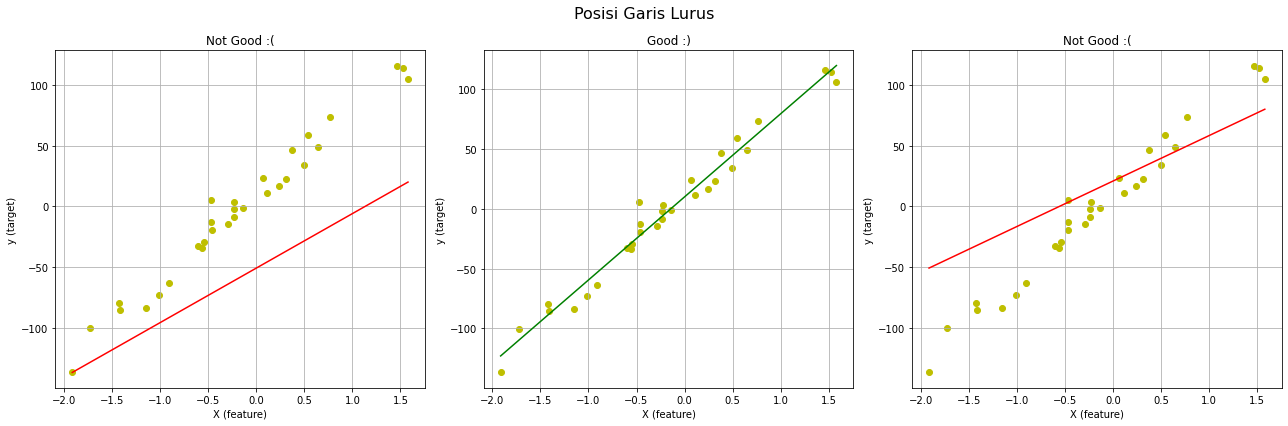

In [5]:
fig, ax = plt.subplots(nrows=1,ncols=3, figsize=(18, 6), tight_layout=True)

fig.suptitle("Posisi Garis Lurus", size=16)

ax[0].set(
    title="Not Good :(",
    xlabel="X (feature)",
    ylabel="y (target)",
)
ax[0].grid()
ax[0].scatter(X, y, c="y")
ax[0].plot([-1.913280244657798, 1.5792128155073917], [-136.7458953721814, 20.10575724343158], c="r")

ax[1].set(
    title="Good :)",
    xlabel="X (feature)",
    ylabel="y (target)",
)
ax[1].grid()
ax[1].scatter(X, y, c="y")
ax[1].plot([-1.913280244657798, 1.5792128155073917], [-122.95563183951853, 119.50544436730426], c="g")

ax[2].set(
    title="Not Good :(",
    xlabel="X (feature)",
    ylabel="y (target)",
)
ax[2].grid()
ax[2].scatter(X, y, c="y")
ax[2].plot([-1.913280244657798, 1.5792128155073917], [-50.7458953721814, 80.10575724343158], c="r");

## Train Model

In [6]:
from sklearn.linear_model import Ridge

model = Ridge()
model.fit(X, y)

print(f"Weight : {model.coef_}")
print(f"Bias   : {model.intercept_}")

Weight : [66.58876521]
Bias   : 9.337624892592727


## Prediction

In [7]:
y_preds = model.predict(X)
y_preds

array([ -67.3056162 ,  -28.10440738,    0.1307758 ,   -6.25326596,
        110.75430242,  -58.10554878,   16.72382318,   25.44959378,
         30.26296674,  -84.70593469,  -21.92409477,  -21.52078705,
        -51.12657708,  114.49545629,   45.46602825,  106.93336665,
         13.83424466,  -26.91214854, -118.06534411, -105.52252367,
        -30.65816381,  -10.08590173,   42.41320701,   34.35489203,
         -5.69654017,   60.44015589,  -21.67474432,   52.46640489,
         -6.2543592 ,  -85.53459757])

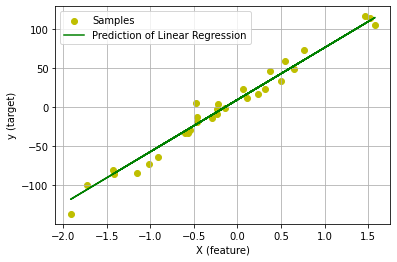

In [8]:
import matplotlib.pyplot as plt

plt.scatter(X, y, c="y", label="Samples")
plt.plot(X, y_preds, c="g", label="Prediction of Linear Regression")
plt.xlabel("X (feature)")
plt.ylabel("y (target)")
plt.legend()
plt.grid();

# Evaluate

## R-Squared, Explained Variance, and RMSE (Root Mean Square Error)

- [R-Squared Explanantion](https://scikit-learn.org/stable/modules/model_evaluation.html#r2-score-the-coefficient-of-determination)
- [Mean Squared Error Explanation](https://scikit-learn.org/stable/modules/model_evaluation.html#mean-squared-error)
- [Explained Variance Explanation](https://scikit-learn.org/stable/modules/model_evaluation.html#explained-variance-score)

In [9]:
from sklearn.metrics import r2_score, mean_squared_error

y_preds = model.predict(X)

print(f"r2_score                 : {r2_score(y, y_preds)}")
print(f"root_mean_squared_error  : {mean_squared_error(y, y_preds, squared=False)}")

r2_score                 : 0.9734271988205123
root_mean_squared_error  : 10.141332940014836


## Residual Plot

[Interpreting Residual Plot](https://www.qualtrics.com/support/stats-iq/analyses/regression-guides/interpreting-residual-plots-improve-regression/)

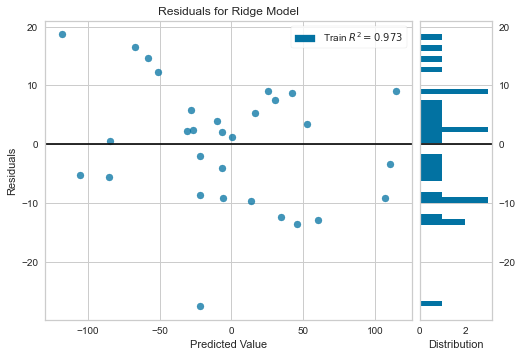

In [10]:
from yellowbrick.regressor import ResidualsPlot

visualizer = ResidualsPlot(model)
visualizer.fit(X, y)
visualizer.show();

***
Semoga bermanfaat yah 😄

*Dibuat dengan penuh 💚 oleh [haloapping](https://haloapping.github.io/)*
***